In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# color palettes
col_vGM = '#9553cf'
col_BCB = '#cf3a15'

#### soft to hard

In [26]:
# load data
df_vGM = pd.read_csv('exp2_vGM/a_sh.csv', index_col=0)
df_BCB = pd.read_csv('exp2_BCB/a_sh.csv', index_col=0)

linear fit [vGM]:
 intercept: 0.4633, slope: 0.5396
linear fit [BCB]:
 intercept: 0.4633, slope: 0.5396
[vGM] RMSE: 0.0006
[BCB] RMSE: 0.0006


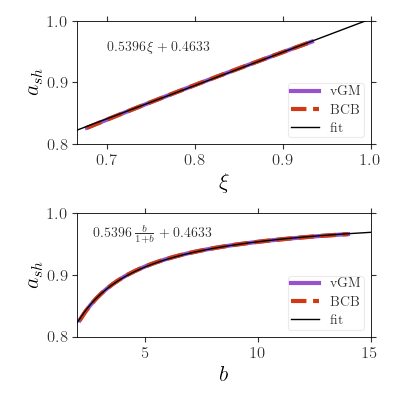

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# van Genuchten - Mualem
xi_vGM = df_vGM['b'] / (1 + df_vGM['b'])
axs[0].plot(xi_vGM, df_vGM['a_sh'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')
axs[1].plot(df_vGM['b'], df_vGM['a_sh'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')

# Brooks - Corey - Burdine
xi_BCB = df_BCB['b'] / (1 + df_BCB['b'])
axs[0].plot(xi_BCB, df_BCB['a_sh'], ls='--', lw=3, c=col_BCB, zorder=1,
            label='BCB')
axs[1].plot(df_BCB['b'], df_BCB['a_sh'], ls='--', lw=3, c=col_BCB, zorder=1, 
            label='BCB')

# fit
p_vGM = np.polyfit(xi_vGM, df_vGM['a_sh'], 1)
print(f'linear fit [vGM]:\n intercept: {p_vGM[1]:.4f}, slope: {p_vGM[0]:.4f}')

p_BCB = np.polyfit(xi_BCB, df_BCB['a_sh'], 1)
print(f'linear fit [BCB]:\n intercept: {p_BCB[1]:.4f}, slope: {p_BCB[0]:.4f}')

x = np.linspace(2/3, 1)
y = np.polyval(p_vGM, x)
axs[0].plot(x, y, ls='-', c='k', lw=1, zorder=2, label='fit')
axs[1].plot(x[:-1] / (1 - x[:-1]), y[:-1], ls='-', c='k', lw=1, zorder=2,
            label='fit')

axs[1].set_xlim(xmin=2, xmax=14)

# relative errors
rmse = np.sqrt(((np.polyval(p_vGM, xi_vGM) - df_vGM['a_sh'])**2).mean())
print(f'[vGM] RMSE: {rmse:.4f}')

rmse = np.sqrt(((np.polyval(p_BCB, xi_BCB) - df_BCB['a_sh'])**2).mean())
print(f'[BCB] RMSE: {rmse:.4f}')



# ax layout
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='linear', yscale='linear')

axs[0].set_xlim(xmin=2/3, xmax=1)
axs[0].set_ylim(ymin=0.8, ymax=1)
axs[0].set_xlabel('$\\xi$', fontsize=16)
axs[0].set_ylabel('$a_{sh}$', fontsize=16)

axs[1].set_xlim(xmin=2, xmax=15)
axs[1].set_ylim(ymin=0.8, ymax=1)
axs[1].set_xlabel('$b$', fontsize=16)
axs[1].set_ylabel('$a_{sh}$', fontsize=16)

axs[0].legend(loc='lower right', fontsize=10)
axs[1].legend(loc='lower right', fontsize=10)

axs[0].text(0.7, 0.95, f'${p_vGM[0]:.4f} \\, \\xi + {p_vGM[1]:.4f}$')
axs[1].text(2.7, 0.96, f'${p_vGM[0]:.4f} \\, \\frac{{b}}{{1+b}} + {p_vGM[1]:.4f}$')


plt.tight_layout()
#plt.savefig(output_path / f'a_sh.pdf')

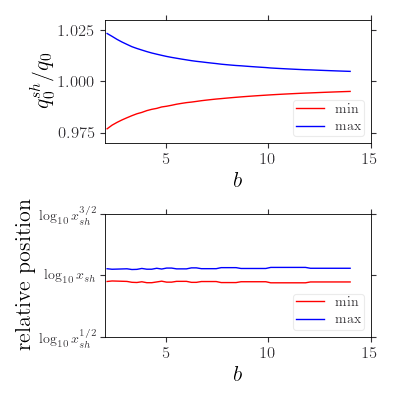

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# van Genuchten - Mualem
axs[0].plot(df_vGM['b'], df_vGM['res. min'], ls='-', lw=1, c='r',
            zorder=0, label='min')
axs[0].plot(df_vGM['b'], df_vGM['res. max'], ls='-', lw=1, c='b',
            zorder=0, label='max')

axs[1].plot(df_vGM['b'], df_vGM['pos. min'], ls='-', lw=1, c='r',
            zorder=0, label='min')
axs[1].plot(df_vGM['b'], df_vGM['pos. max'], ls='-', lw=1, c='b',
            zorder=0, label='max')

# ax layout
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='linear', yscale='linear')
    ax.set_xlim(xmin=2, xmax=15)

axs[0].set_ylim(ymin=0.97, ymax=1.03)
axs[0].set_xlabel('$b$', fontsize=16)
axs[0].set_ylabel('$q_0^{sh} / q_0$', fontsize=16)

axs[1].set_xlim(xmin=2, xmax=15)
axs[1].set_ylim(ymin=0, ymax=1)
axs[1].set_yticks([0, 0.5, 1], fontsize=10,
                  labels=['$\\log_{10} x_{sh}^{1/2}$',
                          '$\\log_{10} x_{sh}$',
                          '$\\log_{10} x_{sh}^{3/2}$'])
axs[1].set_xlabel('$b$', fontsize=16)
axs[1].set_ylabel('relative position', fontsize=16)

axs[0].legend(loc='lower right', fontsize=10)
axs[1].legend(loc='lower right', fontsize=10)

plt.tight_layout()
#plt.savefig(output_path / f'a_sh_residuals.pdf')


#### negligible to soft

In [35]:
# load data
df_vGM = pd.read_csv('exp2_vGM/a_ns.csv', index_col=0)

(c1 + c2 b)^c3 fit [vGM]:
c1: -0.3850, c2: 0.2056, c3: 0.5818
[vGM] RMSE: 0.0063


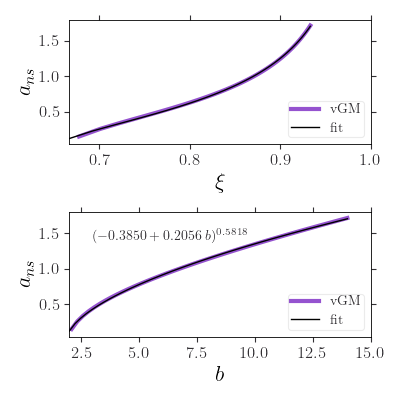

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# van Genuchten - Mualem
xi_vGM = df_vGM['b'] / (1 + df_vGM['b'])
axs[0].plot(xi_vGM, df_vGM['a_ns'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')
axs[1].plot(df_vGM['b'], df_vGM['a_ns'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')

# fit
fit = lambda b, c1, c2, c3: (c1 + c2 * b)**c3
p_vGM, _ = curve_fit(fit, df_vGM['b'], df_vGM['a_ns'], p0=[1, 1, 1])
print(f'(c1 + c2 b)^c3 fit [vGM]:\n' \
      f'c1: {p_vGM[0]:.4f}, c2: {p_vGM[1]:.4f}, c3: {p_vGM[2]:.4f}')

x = np.linspace(2, 14)
y = fit(x, *p_vGM)
axs[0].plot(x / (1 + x), y, ls='-', c='k', lw=1, zorder=2, label='fit')
axs[1].plot(x, y, ls='-', c='k', lw=1, zorder=2, label='fit')

# relative errors
rmse = np.sqrt(((fit(df_vGM['b'], *p_vGM) - df_vGM['a_ns'])**2).mean())
print(f'[vGM] RMSE: {rmse:.4f}')


# ax layout
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='linear', yscale='linear')

axs[0].set_xlim(xmin=2/3, xmax=1)
#axs[0].set_ylim(ymin=0, ymax=1)
axs[0].set_xlabel('$\\xi$', fontsize=16)
axs[0].set_ylabel('$a_{ns}$', fontsize=16)

axs[1].set_xlim(xmin=2, xmax=15)
#axs[1].set_ylim(ymin=0.8, ymax=1)
axs[1].set_xlabel('$b$', fontsize=16)
axs[1].set_ylabel('$a_{ns}$', fontsize=16)

axs[0].legend(loc='lower right', fontsize=10)
axs[1].legend(loc='lower right', fontsize=10)


axs[1].text(3, 1.4, f'$({p_vGM[0]:.4f} + {p_vGM[1]:.4f} \\: b)^{{{p_vGM[2]:.4f}}}$')

plt.tight_layout()
#plt.savefig(output_path / f'a_ns.pdf')

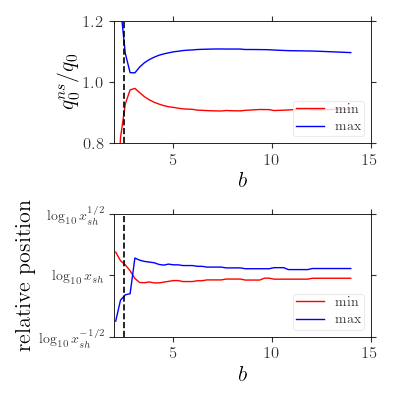

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# van Genuchten - Mualem
axs[0].plot(df_vGM['b'], df_vGM['res. min'], ls='-', lw=1, c='r',
            zorder=0, label='min')
axs[0].plot(df_vGM['b'], df_vGM['res. max'], ls='-', lw=1, c='b',
            zorder=0, label='max')

axs[1].plot(df_vGM['b'], df_vGM['pos. min'], ls='-', lw=1, c='r',
            zorder=0, label='min')
axs[1].plot(df_vGM['b'], df_vGM['pos. max'], ls='-', lw=1, c='b',
            zorder=0, label='max')

n_min = 1.2
axs[0].axvline((5 * n_min - 1) / 2, ls='--', c='k')
axs[1].axvline((5 * n_min - 1) / 2, ls='--', c='k')

# ax layout
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='linear', yscale='linear')
    ax.set_xlim(xmin=2, xmax=15)

axs[0].set_ylim(ymin=0.8, ymax=1.2)
axs[0].set_xlabel('$b$', fontsize=16)
axs[0].set_ylabel('$q_0^{ns} / q_0$', fontsize=16)

axs[1].set_xlim(xmin=2, xmax=15)
axs[1].set_ylim(ymin=0, ymax=1)
axs[1].set_yticks([0, 0.5, 1], fontsize=10,
                  labels=['$\\log_{10} x_{sh}^{-1/2}$',
                          '$\\log_{10} x_{sh}$',
                          '$\\log_{10} x_{sh}^{1/2}$'])
axs[1].set_xlabel('$b$', fontsize=16)
axs[1].set_ylabel('relative position', fontsize=16)

axs[0].legend(loc='lower right', fontsize=10)
axs[1].legend(loc='lower right', fontsize=10)

plt.tight_layout()
#plt.savefig(output_path / f'a_ns_residuals.pdf')

#### Merge negl to soft and soft to hard

In [ ]:
# load data
df_vGM = pd.read_csv('exp2_vGM/a_nsh.csv', index_col=0)
df_vGM.head()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# van Genuchten - Mualem
axs[0].plot(df_vGM['b'], df_vGM['a_nsh'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')
axs[1].plot(df_vGM['b'], df_vGM['cost'], ls='-', lw=3, c=col_vGM, zorder=0,
            label='vGM')

# ax layout
for ax in axs:
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.set(xscale='linear', yscale='linear')


axs[0].set_xlim(xmin=2, xmax=15)
axs[0].set_xlabel('$b$', fontsize=16)
axs[0].set_ylabel('$a_{nsh}$', fontsize=16)

axs[1].set_xlim(xmin=2, xmax=15)
axs[1].set_xlabel('$b$', fontsize=16)
axs[1].set_ylabel('cost', fontsize=16)

axs[0].legend(loc='lower right', fontsize=10)
axs[1].legend(loc='lower right', fontsize=10)

plt.tight_layout()
#plt.savefig(output_path / f'a_ns.pdf')